          使用xception算法将猫狗识别精确度提高到99％以上
基于第一期notebook猫狗识别实例将vgg16算法改用xception算法以求提高准确度。以下是我测试过程中的一些经验(错误之处希望提出更正)：
xception算法又叫extreme inception是因为它是inception的进化版，在原有的inception基础上借用了mobilenet的depthwise separable convolution来代替原有的卷积结构。在top-1准确率和top-5准确率中，xception要比resnet50还要高出0.04。
    1.我在使用xception算法来进行猫狗识别时遇到一些问题，我曾试过冻结base_model所有层来调用该算法，发现模型输出时四个参数有三个为none，导致在后来的模型训练时，测试集丢失率很高达到7.0之上，准确度仅仅0.5多。可见xception算法需要带着imagenet权重进行训练。不可冻结，这也算是它在调用时与resnet50不同点。
    2.x=base_model.output代表模型输出为二维，这行代码切记仅此一行，否则会导致多维输出。
    3.xception算法默认输入尺寸为299*299，通过实验发现当尺寸为299*299要比224*224准确度更高。它支持的维度输入仅是(高度，宽度，通道)
    4.对于learning_rate,epoch,batch_size等参数分别设置为1e-4,30,18
    5神经网络改为用keras构建resnet50卷积神经网络,代码：base_model = Xception(weights="imagenet", include_top=False, pooling=None, input_shape=(ROWS, COLS, CHANNELS), classes=2)它将会访问并下载
https://github.com/fchollet/deep-learning-models/releases/download/v0.2/xception_weights_tf_dim_ordering_tf_kernels_notop.h5
下载速度主要受受本地网速和华为云用户多少影响，至于华为云本身下载速度还是蛮快的
    6.整个识别过程包括:相关函数库引用，下载数据集，数据集标记，分割数据集，用算法构建卷积神经网络，训练模型，预测准确度。
    7.xception算法在训练的时候可能比其他算法要慢一些，训练一次大概7分钟吧。这应该与它的尺寸有关
    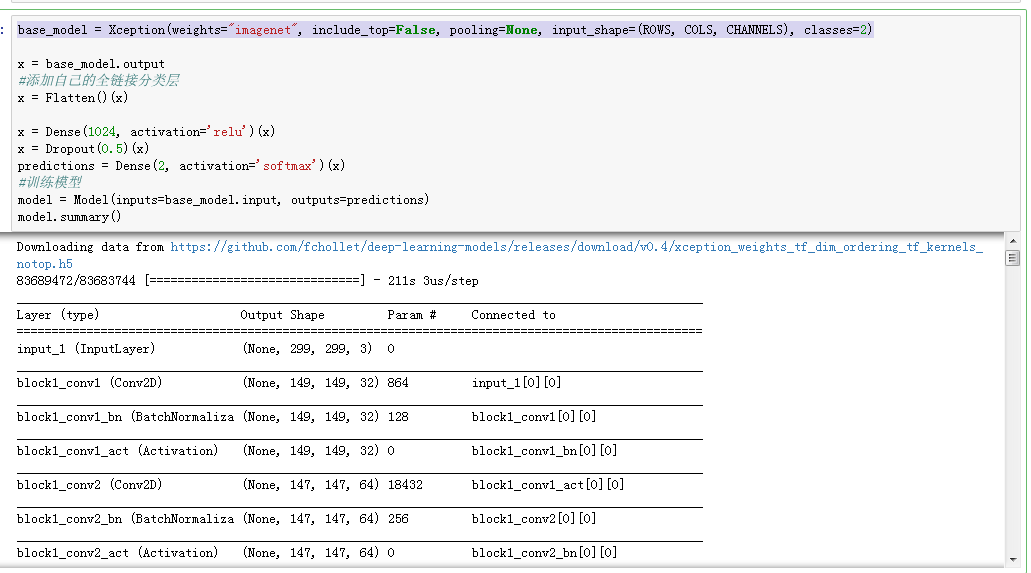
    8.详细执行过程请看代码。